In [ ]:
def plot_1d_time_series(vector, title="1D Time Series", xlabel="Index", ylabel="Value"):
    """
    Plots a 1D vector as a time series.

    Args:
        vector: A list or numpy array representing the 1D time series.
        title: The title of the plot.
        xlabel: The label for the x-axis.
        ylabel: The label for the y-axis.
    """

    if not isinstance(vector, (list, np.ndarray)):
        raise TypeError("Input 'vector' must be a list or numpy array.")

    if isinstance(vector, list):
        vector = np.array(vector)  # Convert list to numpy array for easier handling

    plt.figure(figsize=(10, 5))  # Adjust figure size as needed
    plt.plot(vector)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True)  # Add gridlines for better readability
    plt.show()

In [ ]:
patients_connectomes = {}
controls_connectomes = {}
other_controls_connectomes = {}
shapiro_pvalues = None
cov_sensitivity = 0.5

for patient in patients_list:
    organs_raw = patients_data[patient].loc["SUV"].to_numpy()
    #shapiro_pvalues = shapiro_lognormal_test(organs_raw)
    #shapiro_pvalues = [s[0] for s in shapiro_pvalues]
    #organs = build_organ_dict(organs_raw)
    cov, _ = compute_pairwise_covariance(organs_raw)
    adj_matrix, organ_names = build_adjacency_matrix2(patients_data[patient].loc["SUV"], metric="bhattacharyya", threshold=0, covariance_matrix=cov, cov_sensitivity= cov_sensitivity)
    adj_matrix2, _ = build_adjacency_matrix2(patients_data[patient].loc["SUV"], metric="kl_divergence", threshold=0, covariance_matrix=cov, cov_sensitivity= cov_sensitivity)
    #adj_matrix3, _ = build_adjacency_matrix2(patients_data[patient].loc["SUV"], metric="euclidean-on-log", threshold=0, covariance_matrix=cov, cov_sensitivity= cov_sensitivity)
    adj_matrix4, _ = build_adjacency_matrix2(patients_data[patient].loc["SUV"], metric="wasserstein", threshold=0, covariance_matrix=cov, cov_sensitivity= cov_sensitivity)
    adj_matrix5, _ = build_adjacency_matrix2(patients_data[patient].loc["SUV"], metric="energy", threshold=0, covariance_matrix=cov, cov_sensitivity= cov_sensitivity)

    patients_connectomes[patient] = {'bhattacharyya': (adj_matrix), 
                                     'kl_divergence': (adj_matrix2), 
                                     #'euclidean-on-log': (adj_matrix3), 
                                     'wasserstein': (adj_matrix4), 
                                     'energy': (adj_matrix5),
                                     #'organs': organs
                                     }
    print(f"Patient {patient} completed")

for patient in controls_list:
    organs_raw = controls_data[patient].loc["SUV"].to_numpy()
    #shapiro_pvalues = shapiro_lognormal_test(organs_raw)
    #shapiro_pvalues = [s[0] for s in shapiro_pvalues]
    #organs = build_organ_dict(organs_raw)
    cov, _ = compute_pairwise_covariance(organs_raw)
    adj_matrix, organ_names = build_adjacency_matrix2(controls_data[patient].loc["SUV"], metric="bhattacharyya", threshold=0, covariance_matrix=cov, cov_sensitivity= cov_sensitivity)
    adj_matrix2, organ_names2 = build_adjacency_matrix2(controls_data[patient].loc["SUV"], metric="kl_divergence", threshold=0, covariance_matrix=cov, cov_sensitivity= cov_sensitivity)
    #adj_matrix3, organ_names3 = build_adjacency_matrix2(controls_data[patient].loc["SUV"], metric="euclidean-on-log", threshold=0, covariance_matrix=cov, cov_sensitivity= cov_sensitivity)
    adj_matrix4, organ_names4 = build_adjacency_matrix2(controls_data[patient].loc["SUV"], metric="wasserstein", threshold=0, covariance_matrix=cov, cov_sensitivity= cov_sensitivity)
    adj_matrix5, _ = build_adjacency_matrix2(controls_data[patient].loc["SUV"], metric="energy", threshold=0, covariance_matrix=cov, cov_sensitivity= cov_sensitivity)
    controls_connectomes[patient] = {'bhattacharyya': (adj_matrix), 
                                     'kl_divergence': (adj_matrix2), 
                                     #'euclidean-on-log': (adj_matrix3), 
                                     'wasserstein': (adj_matrix4), 
                                     'energy': (adj_matrix5),
                                     #'organs': organs
                                     }
    print(f"Control {patient} completed")
    
for patient in other_controls_list:
    organs_raw = other_controls_data[patient].loc["SUV"].to_numpy()
    #shapiro_pvalues = shapiro_lognormal_test(organs_raw)
    #shapiro_pvalues = [s[0] for s in shapiro_pvalues]
    #organs = build_organ_dict(organs_raw)
    cov, _ = compute_pairwise_covariance(organs_raw)
    adj_matrix, organ_names = build_adjacency_matrix2(other_controls_data[patient].loc["SUV"], metric="bhattacharyya", threshold=0, covariance_matrix=cov, cov_sensitivity= cov_sensitivity)
    adj_matrix2, organ_names2 = build_adjacency_matrix2(other_controls_data[patient].loc["SUV"], metric="kl_divergence", threshold=0, covariance_matrix=cov, cov_sensitivity= cov_sensitivity)
    #adj_matrix3, organ_names3 = build_adjacency_matrix2(other_controls_data[patient].loc["SUV"], metric="euclidean-on-log", threshold=0, covariance_matrix=cov, cov_sensitivity= cov_sensitivity)
    adj_matrix4, organ_names4 = build_adjacency_matrix2(other_controls_data[patient].loc["SUV"], metric="wasserstein", threshold=0, covariance_matrix=cov, cov_sensitivity= cov_sensitivity)
    adj_matrix5, _ = build_adjacency_matrix2(other_controls_data[patient].loc["SUV"], metric="energy", threshold=0, covariance_matrix=cov, cov_sensitivity= cov_sensitivity)
    other_controls_connectomes[patient] = {'bhattacharyya': (adj_matrix), 
                                           'kl_divergence': (adj_matrix2), 
                                           #'euclidean-on-log': (adj_matrix3), 
                                           'wasserstein': (adj_matrix4), 
                                           'energy': (adj_matrix5),
                                           #'organs': organs
                                           }
    print(f"Other control {patient} completed")
#del controls_data, patients_data, organs


### VAE Attempt

In [ ]:
import numpy as np

import tensorflow as tf
from tensorflow.keras import layers 

import matplotlib.pyplot as plt

from VAE.utils import *
from VAE.ConvVAE import *

num_spirals = 2
num_points = len(combined_connectomes)

# Generate a 5-dimensional spiral dataset
dimensions = 127
features = 127

batch_size = 16
epochs = 20
latent_dim = 150
num_examples_to_generate = 4

max_training = None
max_testing = None

In [ ]:
x_train_t, x_test_t = remove_last_n_elements_and_slice(combined_connectomes, 10)
x_train = np.array([patient_matrices[__METRIC__] for patient_matrices in (x_train_t).values()])
x_test = np.array([patient_matrices[__METRIC__] for patient_matrices in (x_test_t).values()])
y_train = np.array([0 if patient in patients_connectomes else 1 for patient in (x_train_t).keys()])
y_test = np.array([0 if patient in patients_connectomes else 1 for patient in (x_test_t).keys()])
del x_train_t, x_test_t
print(x_train, y_train, x_test, y_test)
print("Data shape:", x_train.shape)  # Should be (n_samples, length, n_features)
print("Labels shape:", y_train.shape)  # Should be (n_samples,)


[[[0.00000000e+00 8.29306083e-01 8.75485501e-01 ... 7.39876417e-01
   8.69141348e-01 8.47533088e-01]
  [8.29306083e-01 0.00000000e+00 9.72391532e-01 ... 3.15453556e-01
   5.50321421e-01 5.11454732e-01]
  [8.75485501e-01 9.72391532e-01 0.00000000e+00 ... 4.11679198e-01
   5.63646325e-01 5.15182503e-01]
  ...
  [7.39876417e-01 3.15453556e-01 4.11679198e-01 ... 0.00000000e+00
   7.68947917e-01 8.01418198e-01]
  [8.69141348e-01 5.50321421e-01 5.63646325e-01 ... 7.68947917e-01
   0.00000000e+00 9.96653944e-01]
  [8.47533088e-01 5.11454732e-01 5.15182503e-01 ... 8.01418198e-01
   9.96653944e-01 0.00000000e+00]]

 [[0.00000000e+00 1.16468421e-01 5.97738735e-01 ... 1.66890225e-03
   7.75469342e-01 2.06430164e-01]
  [1.16468421e-01 0.00000000e+00 6.46175019e-01 ... 1.23750911e-02
   5.85959255e-03 8.03296930e-07]
  [5.97738735e-01 6.46175019e-01 0.00000000e+00 ... 4.13471544e-02
   2.45634538e-01 5.57270355e-03]
  ...
  [1.66890225e-03 1.23750911e-02 4.13471544e-02 ... 0.00000000e+00
   1.35067

In [ ]:
train_dataset, test_dataset, train_size, test_size = build_tf_dataset(x_train, x_test, batch_size, max_training, max_testing, True)

Raw train dataset completed.
Raw datasets prepared!
Train dataset completed
Test dataset completed
Train and test datasets prepared!


In [ ]:
tf.config.run_functions_eagerly(False)
optimizer = tf.keras.optimizers.Adam(0.00005,beta_1=0.9, beta_2=0.999,epsilon=1e-08, clipnorm=5.0) #, clipnorm=1.0

conv_config_2d = [
            {'filters': 32,  'kernel': [(5,5), (1,3)], 'stride': [1,1], 'activ': ('elu', 'elu')},
            {'filters': 64,  'kernel': [(1,3), (1,2)], 'stride': [1,1], 'activ': ('elu', 'elu')},
            {'filters': 128, 'kernel': [(1,3), (1,2)], 'stride': [1,1], 'activ': ('elu', 'elu')},
            {'filters': 256, 'kernel': [(1,2), (1,1)], 'stride': [1,1], 'activ': ('elu', 'elu')},
]

model = ConvVAE(latent_dim, dimensions, features, conv_config_2d, default_2dCNN_builder)

/Users/aldric-l/Library/Python/3.11/lib/python/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [ ]:
assert batch_size >= num_examples_to_generate
for test_batch in test_dataset.take(1):
    test_sample = test_batch[0:num_examples_to_generate]

2025-02-28 18:08:07.442522: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [ ]:
def generate_and_save_matrices(model, epoch, test_sample, save):
    """
    Generates and saves plots of original and reconstructed sine waveforms for a VAE.

    Parameters:
    - model: The trained VAE model.
    - epoch: Current epoch number (int).
    - test_sample: A batch of input test samples (numpy array).
    - freq: Frequency of the sine wave or sampling frequency.
    - save: Filename prefix for saving the output image.
    """
    # Encode test samples to latent space
    mean, logvar = model.encode(test_sample)
    z = model.reparameterize(mean, logvar)
    predictions = model.sample(z)

    # Create a plot for original and reconstructed sine waveforms
    num_samples = predictions.shape[0]
    print("Num samples ", num_samples)
    for i in range(predictions.shape[0]):
        plot_correlogram(predictions[i], test_sample[i], titles=["Reconstructed", "Original"])


In [ ]:
def custom_rloss(x_pred, x_true):
    return 100 * tf.keras.losses.Huber(delta=1.0)(x_pred, x_true)

Total Loss: 35.61336135864258, Reconstruction Loss: 33.21330261230469, KL Divergence: 2.4000585079193115, Beta: 1
Num samples  4


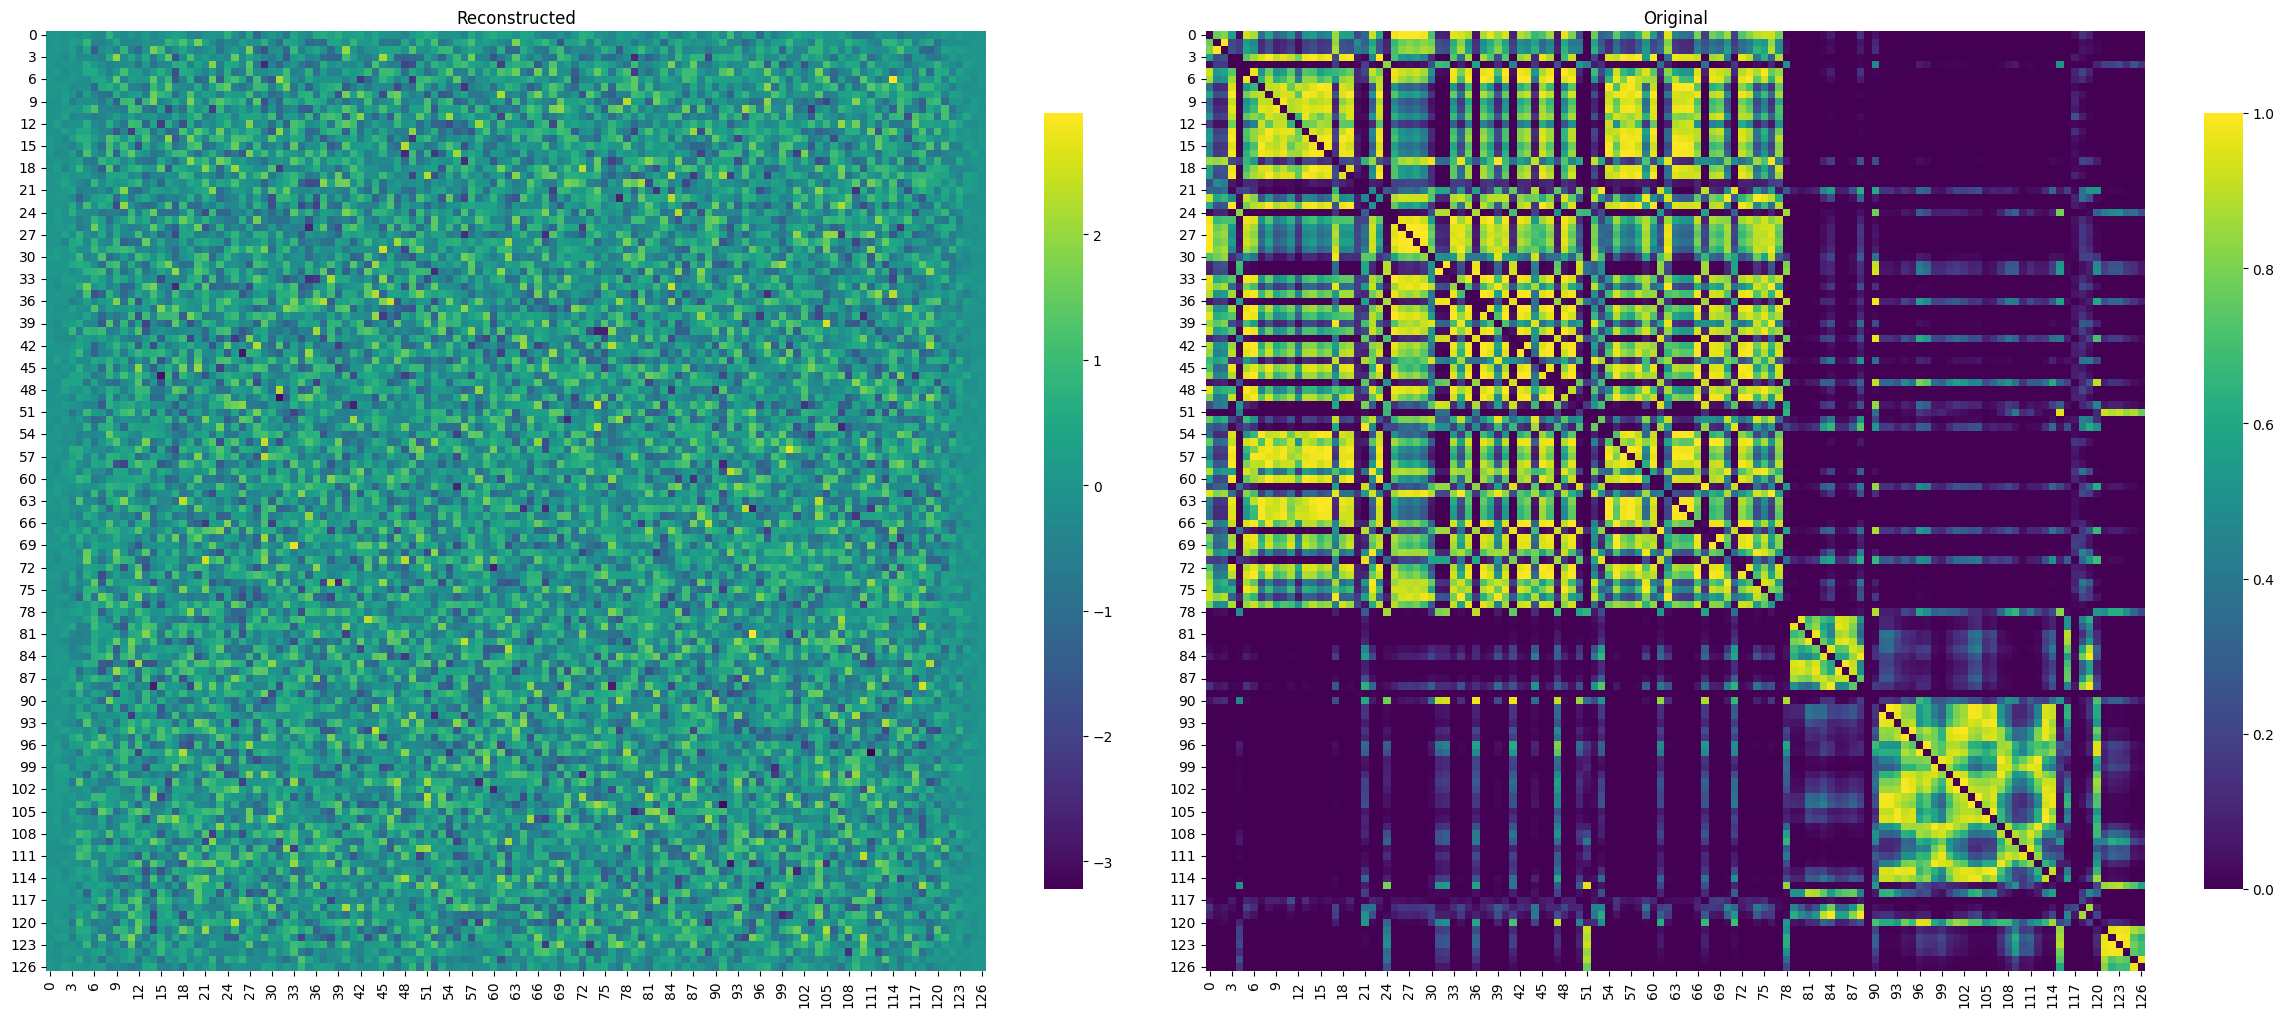

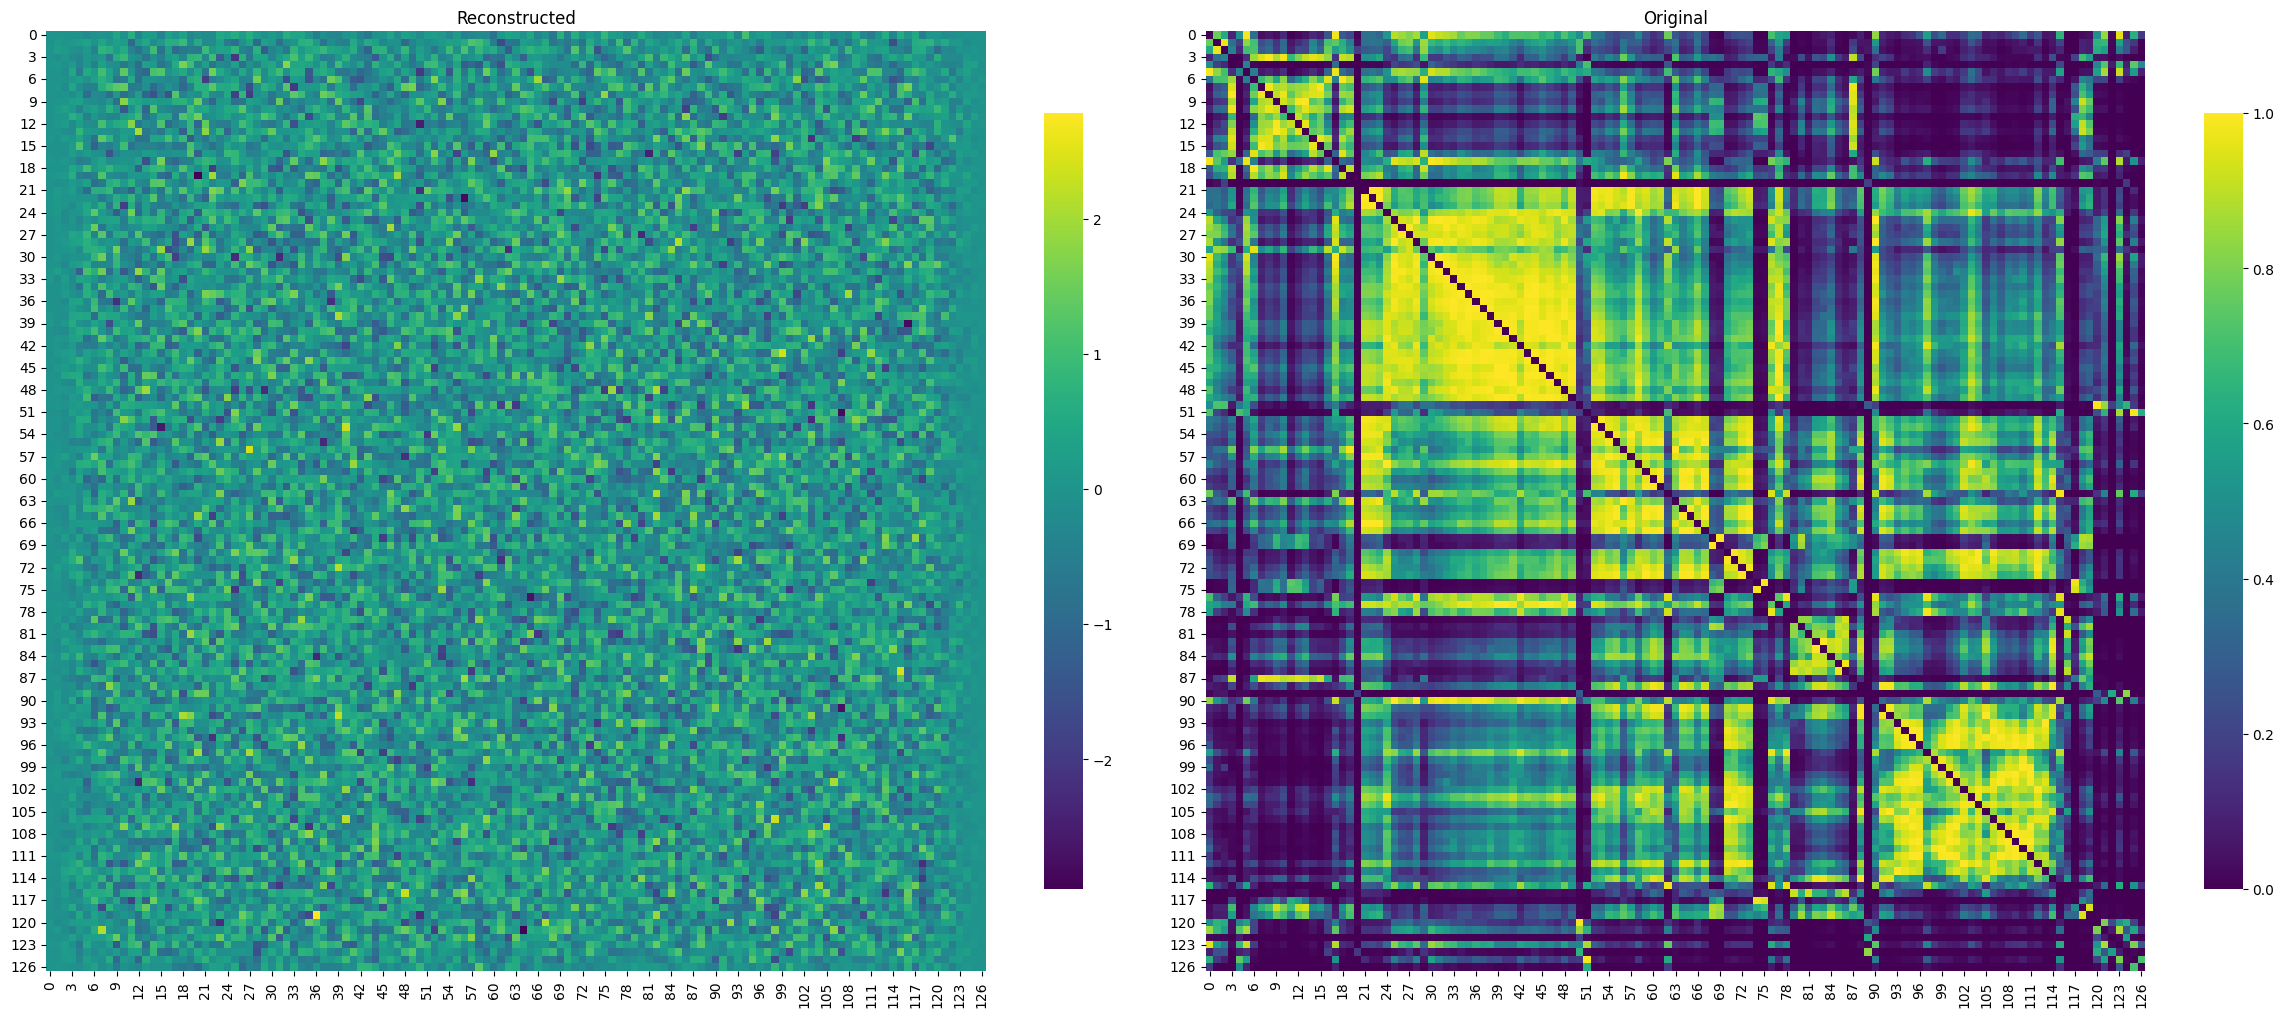

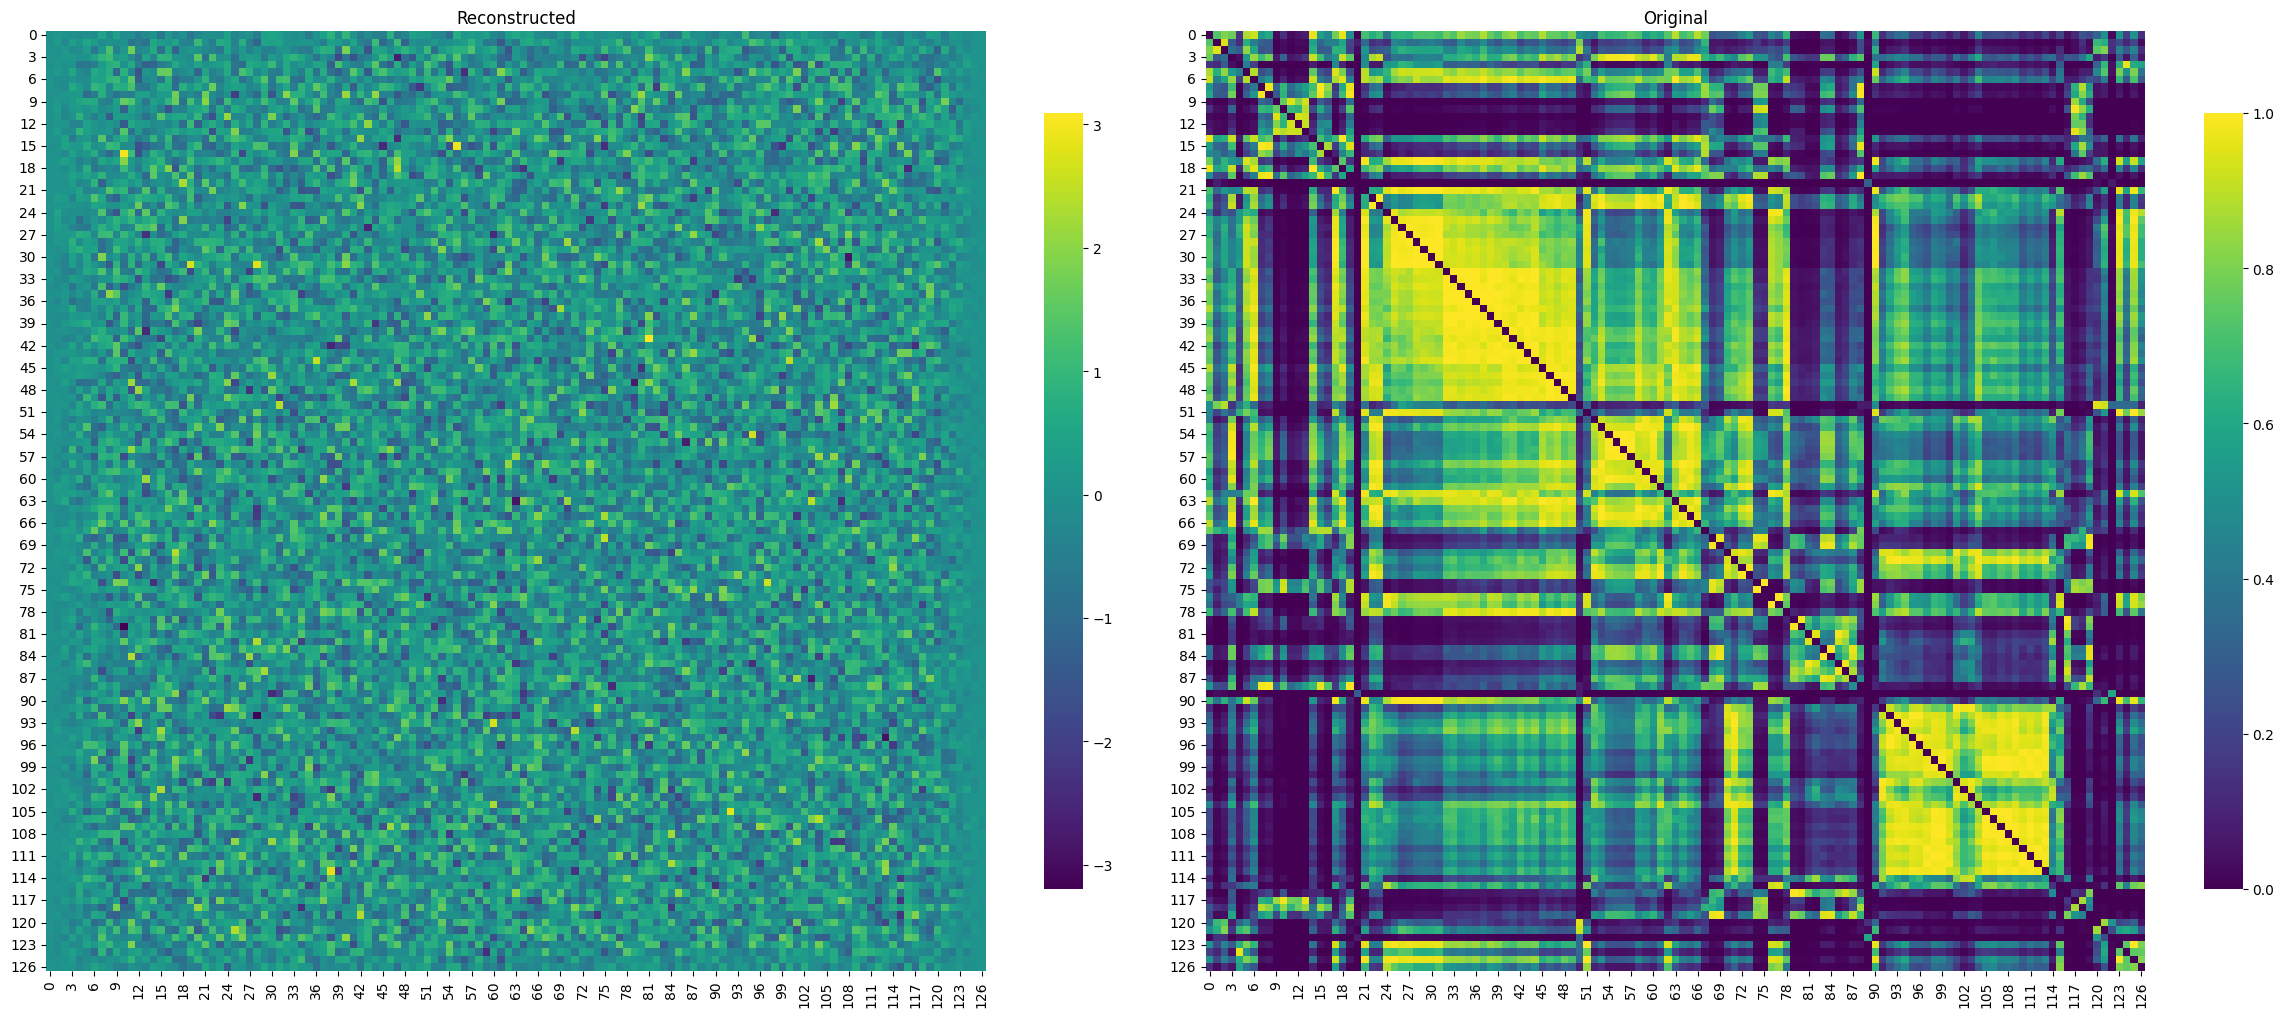

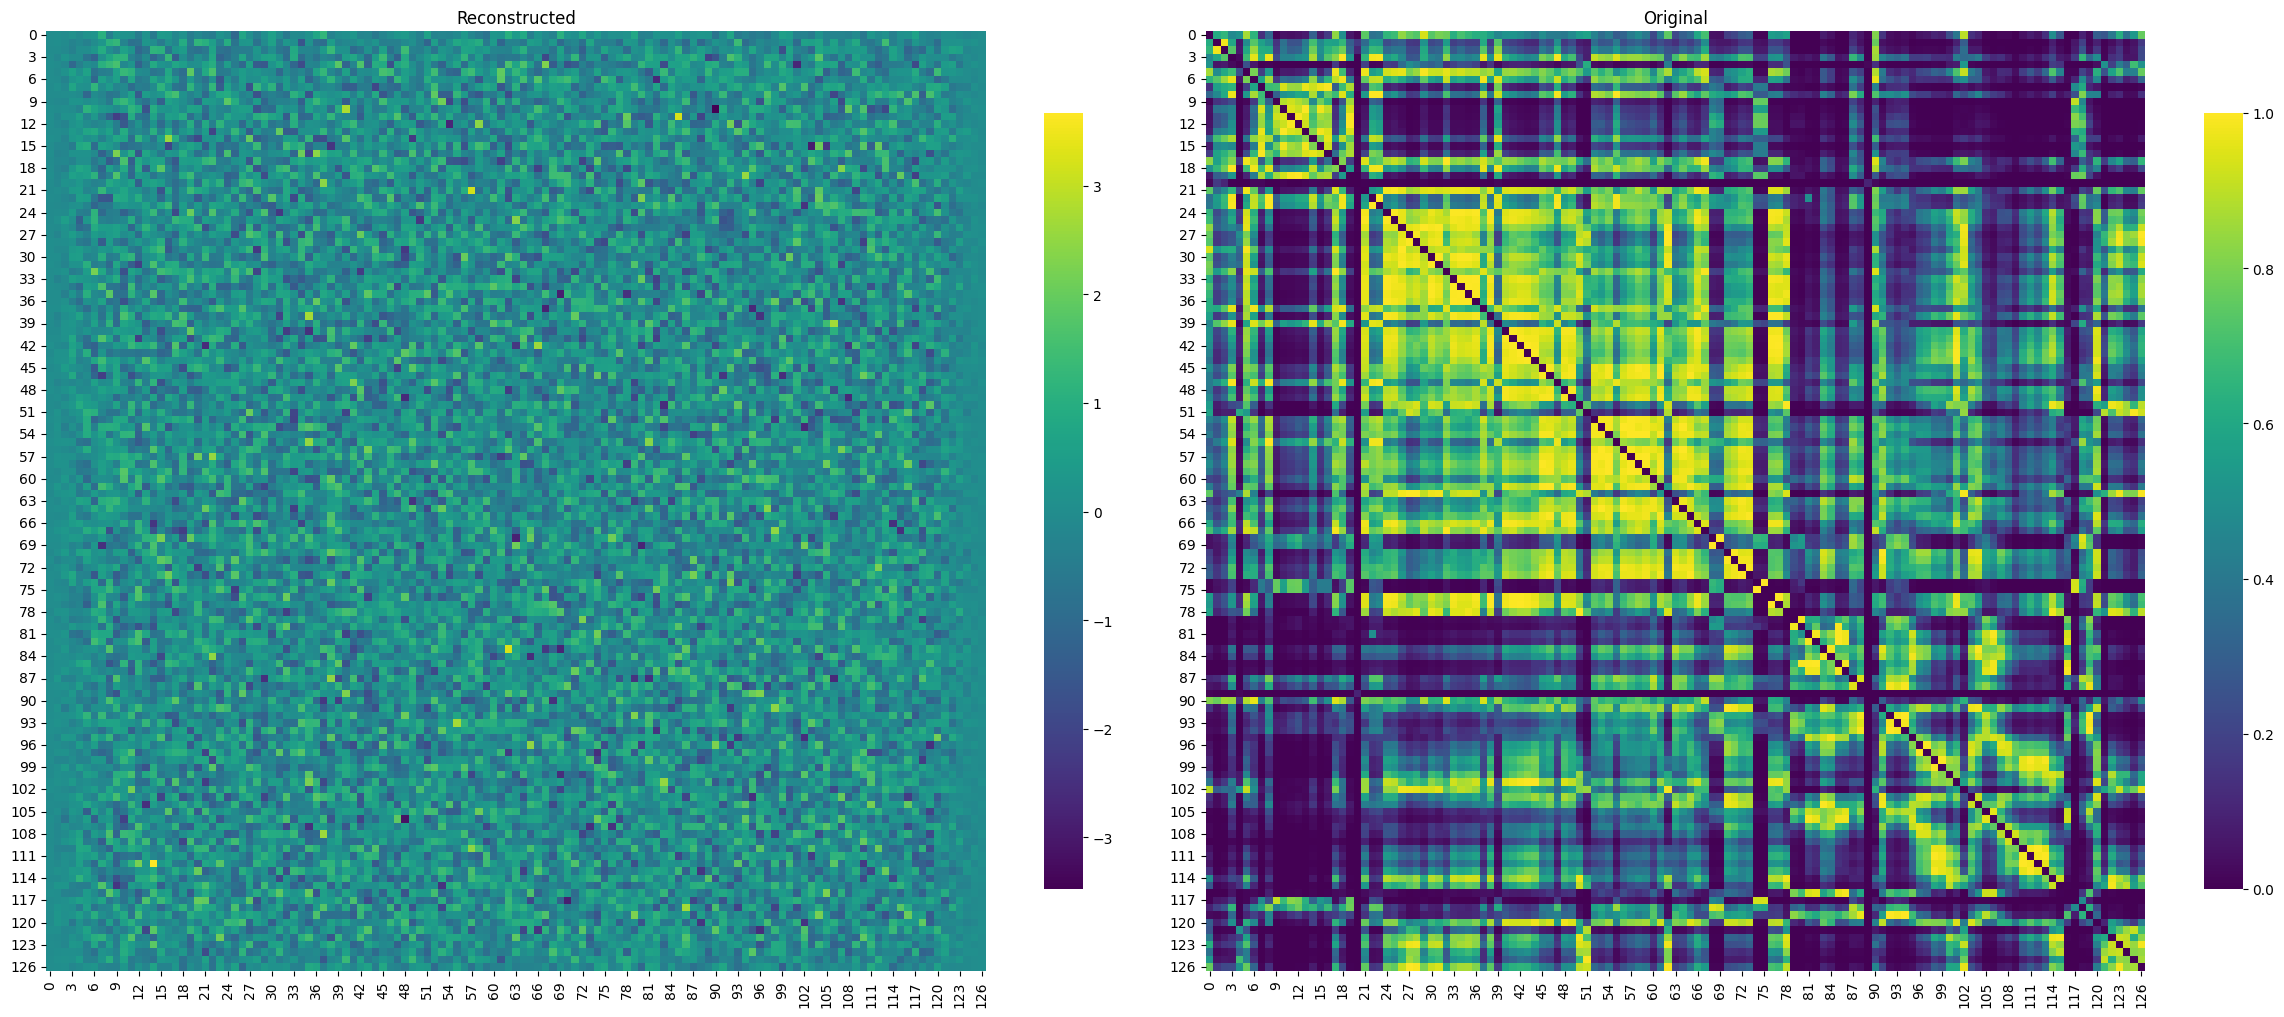

Epoch: 0, Test set ELBO: -35.61336135864258, time elapse for current epoch: 0


: 

In [ ]:
model.set_varClipping(-20, 20)
default_train_VAE(epochs=epochs, 
                  train_dataset=train_dataset, test_dataset=test_dataset, 
                  model=model, optimizer=optimizer,
                  loss_function=default_compute_loss, rloss_function=custom_rloss,
                  callback_function=generate_and_save_matrices, test_sample=test_sample, save='experiment')

In [ ]:
plot_1d_time_series(patients_data[patients_list[0]].loc["mean_SUV"].to_numpy() / max(patients_data[patients_list[0]].loc["mean_SUV"].to_numpy()))
plot_1d_time_series(patients_data[patients_list[10]].loc["mean_SUV"].to_numpy() / max(patients_data[patients_list[10]].loc["mean_SUV"].to_numpy()))
plot_1d_time_series(controls_data[controls_list[10]].loc["mean_SUV"].to_numpy() / max(controls_data[controls_list[10]].loc["mean_SUV"].to_numpy()))

In [ ]:
from sklearn.neighbors import KernelDensity
from scipy.integrate import quad, dblquad

def kde_entropy(kde, dims=1, bounds=(-np.inf, np.inf)):
    """
    Compute entropy H(X) from a kernel density estimate.
    
    Parameters:
    - kde: A trained KernelDensity object.
    - dims: Number of dimensions (1D or 2D).
    - bounds: Integration bounds.
    
    Returns:
    - Entropy value.
    """
    def integrand_1d(x):
        x = np.atleast_1d(x).reshape(-1, 1)  # Ensure x is 1D
        p_x = np.exp(kde.score_samples(x))[0]
        return -p_x * np.log2(p_x) if p_x > 0 else 0

    def integrand_2d(x, y):
        xy = np.array([[x, y]])  # Ensure proper shape
        p_xy = np.exp(kde.score_samples(xy))[0]
        return -p_xy * np.log2(p_xy) if p_xy > 0 else 0

    if dims == 1:
        result, _ = quad(integrand_1d, *bounds)
    else:
        result, _ = dblquad(integrand_2d, *bounds, lambda x: bounds[0], lambda x: bounds[1])
    
    return result

def kde_mutual_information(X, Y, bandwidth=0.1):
    """
    Compute mutual information between two continuous variables using KDE.
    
    Parameters:
    - X, Y: 1D numpy arrays (should be same length or interpolated).
    - bandwidth: KDE bandwidth for smoothing.
    
    Returns:
    - Estimated mutual information value.
    """
    # Train KDE models for each variable
    kde_X = KernelDensity(kernel='gaussian', bandwidth=bandwidth).fit(X.reshape(-1, 1))
    kde_Y = KernelDensity(kernel='gaussian', bandwidth=bandwidth).fit(Y.reshape(-1, 1))
    
    # Compute entropy for each variable
    H_X = kde_entropy(kde_X, dims=1)
    H_Y = kde_entropy(kde_Y, dims=1)
    
    # Joint KDE
    min_len = min(len(X), len(Y))
    X_interp = np.interp(np.linspace(0, 1, min_len), np.linspace(0, 1, len(X)), X)
    Y_interp = np.interp(np.linspace(0, 1, min_len), np.linspace(0, 1, len(Y)), Y)
    XY = np.vstack([X_interp, Y_interp]).T
    kde_XY = KernelDensity(kernel='gaussian', bandwidth=bandwidth).fit(XY)
    
    # Compute joint entropy with 2D integration
    H_XY = kde_entropy(kde_XY, dims=2)

    # Mutual Information: I(X; Y) = H(X) + H(Y) - H(X, Y)
    return H_X + H_Y - H_XY

def compute_mi_matrix(organs, bandwidth=0.1):
    """
    Compute the mutual information matrix for organs of different lengths.
    
    Parameters:
    - organs: Dictionary where keys are organ names and values are 1D numpy arrays (can have different lengths).
    - bandwidth: KDE bandwidth for smoothing.
    
    Returns:
    - A dictionary representing the mutual information matrix.
    """
    n = len(organs)
    mi_matrix = np.zeros((n, n))

    for i in range(n):
        for j in range(n):
            if i == j:
                mi_matrix[i, j] = 0  # Self mutual information is not relevant
            else:
                mi_matrix[i, j] = kde_mutual_information(organs[i], organs[j], bandwidth)
    
    return mi_matrix

organs = patients_data[patients_list[0]].loc["SUV"].to_numpy()
organs.shape
compute_mi_matrix(organs)
